In [16]:
from mnmf import mnmf
import numpy as np
import soundfile as sf
import scipy.signal as ss
from scipy.io.wavfile import write
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from drawer import plot_components

In [20]:
part1_org, sr = librosa.load('../data/voice1_original.mp3')
part2_org, sr = librosa.load('../data/voice1_original.mp3')

orgs = np.vstack([part1_org, part2_org])

display(ipd.Audio(part1_org, rate = sr))
display(ipd.Audio(part2_org, rate = sr))

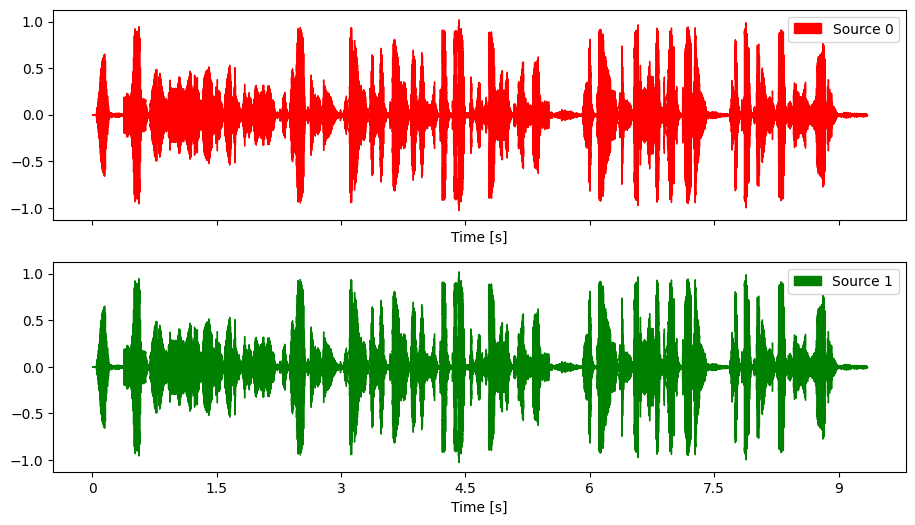

In [22]:
plot_components(orgs, sr)

In [9]:
part1, sr = librosa.load('../data/voice1.mp3')
part2, sr = librosa.load('../data/voice2.mp3')

NUM_ITER, FFT, HOP = 20, 4096, 2048

x = np.vstack([part1, part2])

n_channels, T = x.shape
n_sources = n_channels

display(ipd.Audio(part1, rate = sr))
display(ipd.Audio(part2, rate = sr))

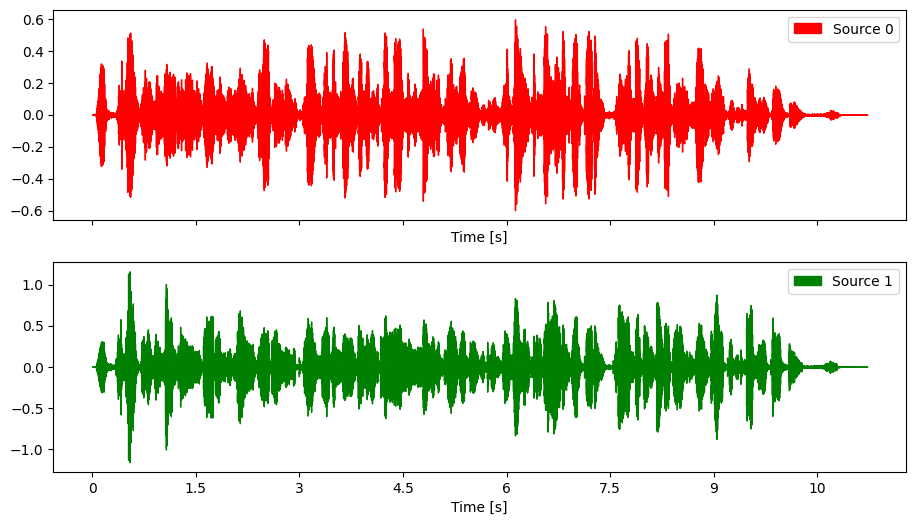

In [10]:
plot_components(x, sr)

In [11]:
_, _, X = ss.stft(x, nperseg = FFT, noverlap = HOP)
Y = mnmf(X, n_basis = 2, iteration = NUM_ITER)
_, y = ss.istft(Y, nperseg = FFT, noverlap = HOP)
y = y[:, :T]

In [24]:
for i in y:
    display(ipd.Audio(i, rate = sr))

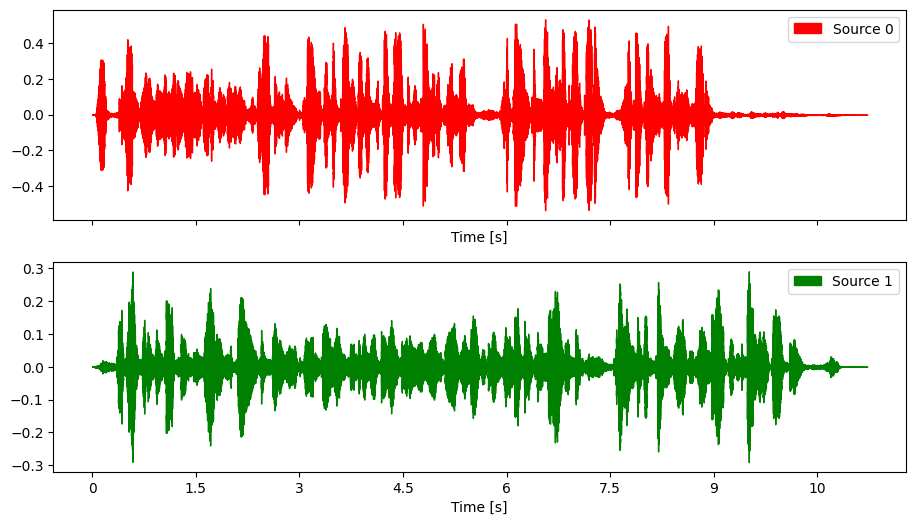

In [12]:
plot_components(y, sr)

[-6.3372932e-14  1.7860621e-14  3.3426112e-14 ...  3.2240985e-04
  3.7413777e-04  0.0000000e+00]
206036
206036
206036
